# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from matplotlib.offsetbox import AnchoredText

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
print(len(cities))
print(len(countries))
cities_countries = list(zip(cities, countries))
print(cities_countries)


594
594
[('grindavik', 'is'), ('yellowknife', 'ca'), ('asfi', 'ma'), ('kloulklubed', 'pw'), ('thompson', 'ca'), ('rikitea', 'pf'), ('kodiak', 'us'), ('kurchum', 'kz'), ('bluff', 'nz'), ('aksehir', 'tr'), ('busselton', 'au'), ('naze', 'jp'), ('bredasdorp', 'za'), ('cape town', 'za'), ('boguchany', 'ru'), ('baruun-urt', 'mn'), ('aklavik', 'ca'), ('saint-philippe', 're'), ('isangel', 'vu'), ('constitucion', 'mx'), ('yulara', 'au'), ('belushya guba', 'ru'), ('juruti', 'br'), ('port lincoln', 'au'), ('bago', 'mm'), ('broome', 'au'), ('marsh harbour', 'bs'), ('bosaso', 'so'), ('hamilton', 'bm'), ('hermanus', 'za'), ('faanui', 'pf'), ('lebu', 'cl'), ('coquimbo', 'cl'), ('mehamn', 'no'), ('cabo san lucas', 'mx'), ('rabo de peixe', 'pt'), ('stubbekobing', 'dk'), ('loubomo', 'cg'), ('samusu', 'ws'), ('mount gambier', 'au'), ('markova', 'ru'), ('faya', 'td'), ('rawson', 'ar'), ('ponta do sol', 'pt'), ('ushuaia', 'ar'), ('concordia', 'ar'), ('te anau', 'nz'), ('pagudpud', 'ph'), ('barentsburg', 's

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#Initialize an empty dataframe with the names of the datasets that will be collected from weather api
column_names = ["City", "Country", "Lat", "Lng", "Time", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
temp_frame = pd.DataFrame(columns = column_names)

#Start a counter, this will be used for status updates
count = 1


print("Beginning Data Retrieval")
print("-----------------------------")



for city_country in list(cities_countries):
#For every city
#Build the URL and get JSON object for the city
    URL = f"https://api.openweathermap.org/data/2.5/weather?q={city_country[0]},{city_country[1]}&units=imperial&appid={weather_api_key}"
    weather_records = requests.get(URL).json()

#Google returns success and failure codes, I prefer these to try/except blocks.  
#For a successful code I append the relevant records to the temp_frame
#For any other code I treat it as a failure and print "No City Found" to the terminal
    if weather_records["cod"] == 200:
        print(f"Processing Record {count} of {len(cities_countries)}| {weather_records['name']}, {weather_records['sys']['country']}")
        temp_frame = temp_frame.append({"City": weather_records["name"], 
                                        "Country": weather_records["sys"]["country"], 
                                        "Lat": weather_records["coord"]["lat"],
                                        "Lng": weather_records["coord"]["lon"], 
                                        "Time": weather_records["dt"], 
                                        "Max Temp": weather_records["main"]["temp_max"],
                                        "Humidity": weather_records["main"]["humidity"], 
                                        "Cloudiness": weather_records["clouds"]["all"],
                                        "Wind Speed": weather_records["wind"]["speed"]}, 
                                       ignore_index = True)
    else:
        print(f"Processing Record {count} of {len(cities_countries)}| No City Found")

#Number of cities in current run
    count += 1

# Wait one second to not exceed 60call/min API limit
    time.sleep(1)    





Beginning Data Retrieval
-----------------------------
Processing Record 1 of 594| Grindavik, IS
Processing Record 2 of 594| Yellowknife, CA
Processing Record 3 of 594| Safi, MA
Processing Record 4 of 594| Kloulklubed, PW
Processing Record 5 of 594| Thompson, CA
Processing Record 6 of 594| Rikitea, PF
Processing Record 7 of 594| Saint Paul Harbor, US
Processing Record 8 of 594| Kurchum, KZ
Processing Record 9 of 594| Bluff, NZ
Processing Record 10 of 594| Akşehir, TR
Processing Record 11 of 594| Busselton, AU
Processing Record 12 of 594| Naze, JP
Processing Record 13 of 594| Bredasdorp, ZA
Processing Record 14 of 594| Cape Town, ZA
Processing Record 15 of 594| Boguchany, RU
Processing Record 16 of 594| Baruun-Urt, MN
Processing Record 17 of 594| Aklavik, CA
Processing Record 18 of 594| Saint-Philippe, RE
Processing Record 19 of 594| Isangel, VU
Processing Record 20 of 594| Constitucion, MX
Processing Record 21 of 594| Yulara, AU
Processing Record 22 of 594| No City Found
Processing Rec

Processing Record 189 of 594| Andenes, NO
Processing Record 190 of 594| Sai Buri, TH
Processing Record 191 of 594| East London, ZA
Processing Record 192 of 594| Luanda, AO
Processing Record 193 of 594| Iskateley, RU
Processing Record 194 of 594| Khatanga, RU
Processing Record 195 of 594| Ambovombe, MG
Processing Record 196 of 594| Saint-Augustin, CA
Processing Record 197 of 594| No City Found
Processing Record 198 of 594| Tiznit Province, MA
Processing Record 199 of 594| Shingū, JP
Processing Record 200 of 594| Lorengau, PG
Processing Record 201 of 594| Umm Kaddadah, SD
Processing Record 202 of 594| Vila do Maio, CV
Processing Record 203 of 594| Vestmannaeyjar, IS
Processing Record 204 of 594| No City Found
Processing Record 205 of 594| Ulladulla, AU
Processing Record 206 of 594| Maceió, BR
Processing Record 207 of 594| Komsomol'skiy, RU
Processing Record 208 of 594| Caravelas, BR
Processing Record 209 of 594| Yerbogachën, RU
Processing Record 210 of 594| Kavaratti, IN
Processing Recor

Processing Record 379 of 594| Karratha, AU
Processing Record 380 of 594| Santa Rosa, AR
Processing Record 381 of 594| Oussouye, SN
Processing Record 382 of 594| Agüimes, ES
Processing Record 383 of 594| Waipawa, NZ
Processing Record 384 of 594| No City Found
Processing Record 385 of 594| Paragominas, BR
Processing Record 386 of 594| Bathsheba, BB
Processing Record 387 of 594| Adana Province, TR
Processing Record 388 of 594| Angoram, PG
Processing Record 389 of 594| Dicabisagan, PH
Processing Record 390 of 594| Podyuga, RU
Processing Record 391 of 594| Port Moresby, PG
Processing Record 392 of 594| Tautira, PF
Processing Record 393 of 594| No City Found
Processing Record 394 of 594| Xai-Xai, MZ
Processing Record 395 of 594| Pemba, MZ
Processing Record 396 of 594| Huambo, AO
Processing Record 397 of 594| Gorontalo, ID
Processing Record 398 of 594| Kupang, ID
Processing Record 399 of 594| No City Found
Processing Record 400 of 594| Bandarbeyla, SO
Processing Record 401 of 594| Igarka, RU


Processing Record 569 of 594| No City Found
Processing Record 570 of 594| Northam, AU
Processing Record 571 of 594| Yenagoa, NG
Processing Record 572 of 594| Östersund, SE
Processing Record 573 of 594| No City Found
Processing Record 574 of 594| Hay River, CA
Processing Record 575 of 594| Cairns, AU
Processing Record 576 of 594| Mabaruma, GY
Processing Record 577 of 594| Henties Bay, NA
Processing Record 578 of 594| Marsaxlokk, MT
Processing Record 579 of 594| Kropotkin, RU
Processing Record 580 of 594| Nuuk, GL
Processing Record 581 of 594| Balikpapan, ID
Processing Record 582 of 594| Pisco, PE
Processing Record 583 of 594| Marfino, RU
Processing Record 584 of 594| Kayerkan, RU
Processing Record 585 of 594| Novonukutskiy, RU
Processing Record 586 of 594| Şırnak, TR
Processing Record 587 of 594| Laguna, BR
Processing Record 588 of 594| Xinzhi, CN
Processing Record 589 of 594| Tagusao, PH
Processing Record 590 of 594| Lavrentiya, RU
Processing Record 591 of 594| Altagracia de Orituco, V

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame


In [24]:
#save the temperature frame to the csv
temp_frame.to_csv("Temperature_Data.csv")

In [25]:
#display the finished temperature data frame
temp_frame

,City,Country,Lat,Lng,Time,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grindavik,IS,63.84,-22.43,1586652123,35.60,79,40,12.75
1,Yellowknife,CA,62.46,-114.35,1586651896,19.40,52,40,16.11
2,Safi,MA,32.30,-9.24,1586652126,62.69,79,95,12.24
3,Kloulklubed,PW,7.04,134.26,1586652127,86.00,70,75,9.17
4,Thompson,CA,55.74,-97.86,1586651882,19.40,73,90,16.11
...,...,...,...,...,...,...,...,...,...
531,Lavrentiya,RU,65.58,-171.00,1586652794,32.43,96,95,12.46
532,Altagracia de Orituco,VE,9.86,-66.38,1586652795,75.47,61,55,7.16
533,Kalghatgi,IN,15.18,74.97,1586652796,72.48,74,13,1.50
534,Khorramshahr,IR,30.44,48.17,1586652797,71.60,46,1,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

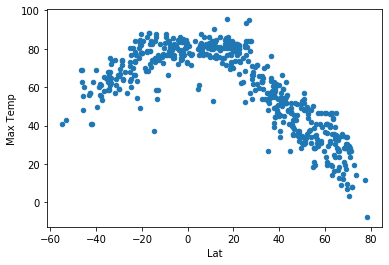

In [26]:
temp_frame.plot(kind='scatter',x="Lat",y="Max Temp")
plt.show()

#### Latitude vs. Humidity Plot

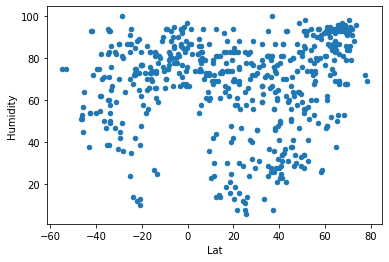

In [27]:
temp_frame.plot(kind='scatter',x="Lat",y="Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

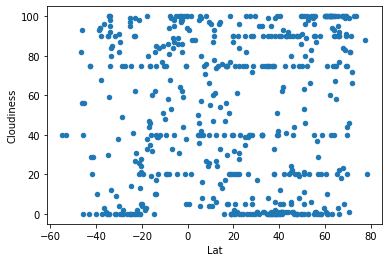

In [28]:
temp_frame.plot(kind='scatter',x="Lat",y="Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

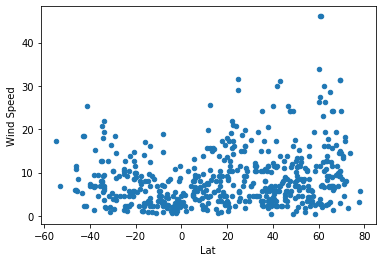

In [29]:
temp_frame.plot(kind='scatter',x="Lat",y="Wind Speed")
plt.show()

## Linear Regression

In [35]:
# OPTIONAL: Create a function to create Linear Regression plots
def plotregression(x_values, y_values, x_label, y_label):
    
    x_values = x_values.astype('float')
    y_values = y_values.astype('float')
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(x_values, y_values)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    
    anchored_text = AnchoredText(line_eq, loc=2)
    ax.add_artist(anchored_text)
    
    plt.show

In [36]:
# Create Northern and Southern Hemisphere DataFrames
north_temp = temp_frame.loc[temp_frame["Lat"]>0]
south_temp = temp_frame.loc[temp_frame["Lat"]<0]
north_temp

,City,Country,Lat,Lng,Time,Max Temp,Humidity,Cloudiness,Wind Speed
0,Grindavik,IS,63.84,-22.43,1586652123,35.60,79,40,12.75
1,Yellowknife,CA,62.46,-114.35,1586651896,19.40,52,40,16.11
2,Safi,MA,32.30,-9.24,1586652126,62.69,79,95,12.24
3,Kloulklubed,PW,7.04,134.26,1586652127,86.00,70,75,9.17
4,Thompson,CA,55.74,-97.86,1586651882,19.40,73,90,16.11
...,...,...,...,...,...,...,...,...,...
530,Tagusao,PH,9.19,117.81,1586652793,82.80,73,4,4.09
531,Lavrentiya,RU,65.58,-171.00,1586652794,32.43,96,95,12.46
532,Altagracia de Orituco,VE,9.86,-66.38,1586652795,75.47,61,55,7.16
533,Kalghatgi,IN,15.18,74.97,1586652796,72.48,74,13,1.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

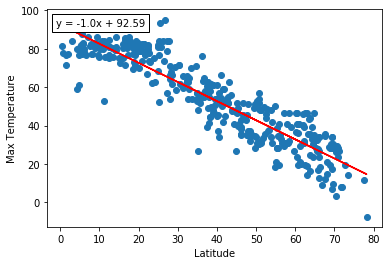

In [37]:
x_values = north_temp["Lat"]
y_values = north_temp["Max Temp"]

plotregression(x_values, y_values, "Latitude", "Max Temperature")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

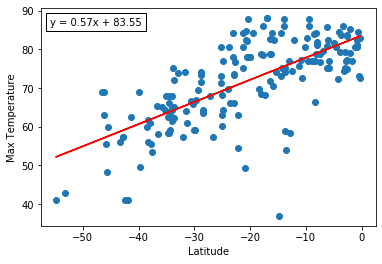

In [38]:
x_values = south_temp["Lat"]
y_values = south_temp["Max Temp"]

plotregression(x_values, y_values, "Latitude", "Max Temperature")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

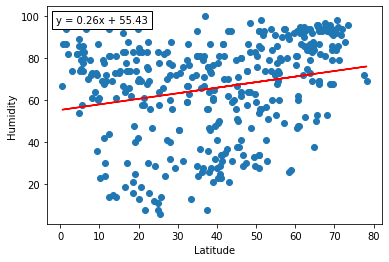

In [39]:
x_values = north_temp["Lat"]
y_values = north_temp["Humidity"]

plotregression(x_values, y_values, "Latitude", "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

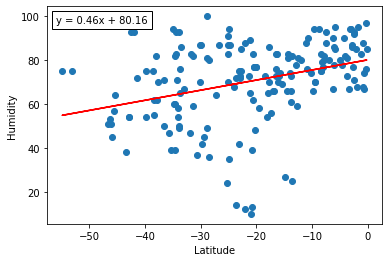

In [40]:
x_values = south_temp["Lat"]
y_values = south_temp["Humidity"]

plotregression(x_values, y_values, "Latitude", "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

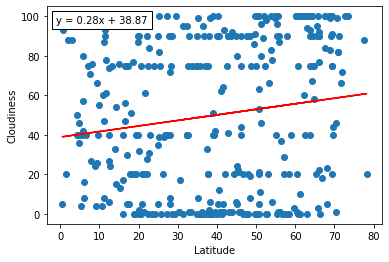

In [41]:
x_values = north_temp["Lat"]
y_values = north_temp["Cloudiness"]

plotregression(x_values, y_values, "Latitude", "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

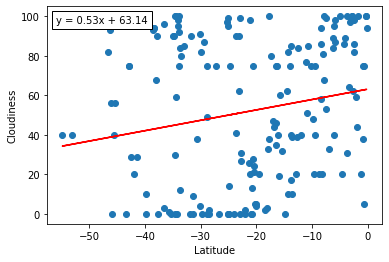

In [42]:
x_values = south_temp["Lat"]
y_values = south_temp["Cloudiness"]

plotregression(x_values, y_values, "Latitude", "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

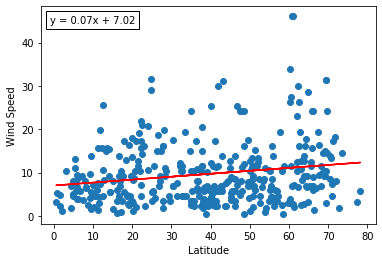

In [43]:
x_values = north_temp["Lat"]
y_values = north_temp["Wind Speed"]

plotregression(x_values, y_values, "Latitude", "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

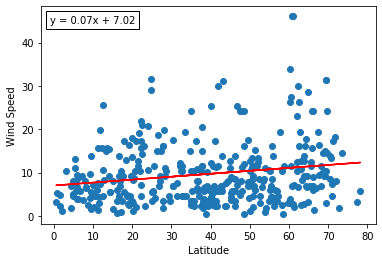

In [44]:
x_values = north_temp["Lat"]
y_values = north_temp["Wind Speed"]

plotregression(x_values, y_values, "Latitude", "Wind Speed")